In [9]:
def Gaussian(a, b):
    n = len(a)
    assert(n > 1)
    m = len(a[0])
    assert(m > 1)
    assert(len(b) == n)
    EPS = 1e-15
    ans = [None for _ in range(m)]
    where = [-1 for _ in range(m)]
    row = 0
    col = 0
    while(row < n and col < m):
        sel = row
        for i in range(row, n):
            if abs(a[i][col]) > abs(a[sel][col]):
                sel = i
        if abs(a[sel][col]) < EPS:
            continue
        for i in range(col, m):
            a[sel][i], a[row][i] = a[row][i], a[sel][i]
        b[sel], b[row] = b[row], b[sel]
        where[col] = row
        for i in range(n):
            if i == row: continue
            c = a[i][col] / a[row][col]
            for j in range(col, m):
                a[i][j] -= a[row][j] * c
            b[i] -= b[row] * c
        row += 1
        col += 1
    for i in range(m):
        if where[i] == -1: continue
        ans[i] = b[where[i]] / a[where[i]][i]
    for i in range(n):
        s = 0
        for j in range(m):
            s += a[i][j] * ans[j]
        if abs(s - b[i]) > EPS:
            for k in range(m):
                ans[k] = None
            return ans
    return ans    

In [119]:
def CubicSplineSujeta(points, ds0, dsn):
    n = len(points) - 1
    assert(n > 0)
    print(points)
    for i in range(n + 1):
        print(points[i][0], points[i][1])
    h = [ points[i+1][0] - points[i][0] for i in range(n)]
    beta = [ (points[i+1][1] - points[i][1]) / h[i] for i in range(n) ]
    v = [ (None if i == 0 else 6 * (beta[i] - beta[i - 1])) for i in range(n)]
    a = [ [None for _ in range(n - 1)] for _ in range(n - 1) ]
    b = [None for _ in range(n - 1)]
    a[0][0] = 3 * h[0] / 2 + 2 * h[1]
    a[0][1] = h[1]
    for i in range(1, n - 2):
        a[i][i] = 2 * (h[i] + h[i+1])
        a[i][i-1] = h[i]
        a[i][i+1] = h[i+1]
    a[n-2][n-3] = h[n-2]
    a[n-2][n-2] = 2 * h[n-2] + 3 * h[n-1] / 2
    b[0] = v[1] - 3 * (beta[0] - ds0)
    for i in range(1, n - 2):
        b[i] = v[i]
    b[n-2] = v[n-1] - 3 * (dsn - beta[n-1])
    print("H: ")
    print(h)
    print("Beta: ")
    print(beta)
    print(sum(h[0:n]) + sum(beta[0 : n]))
    print("Matriz A")
    print(a)
    print("Vector b")
    print(b)
    lamb = Gaussian(a, b)
    print(sum(lamb))
    lambdas = [None for _ in range(n + 1)]
    lambdas[0] = 3 * (beta[0] - ds0) / h[0] - lamb[0] / 2
    lambdas[n] = 3 * (dsn - beta[n-1]) / h[n-1] - lamb[n-2] / 2
    for i in range(1, n):
        lambdas[i] = lamb[i-1]
    print(lambdas)
    A = [points[i][1] for i in range(n)]
    print("A:")
    print(A)
    B = [ (beta[i] - h[i] * (2 * lambdas[i] + lambdas[i+1]) / 6) for i in range(n)]
    print("B:")
    print(B)
    C = [lambdas[i] / 2 for i in range(n)]
    print("C:")
    print(C)
    D = [(lambdas[i+1] - lambdas[i]) / 6 / h[i] for i in range(n)]
    print("D:")
    print(D)
    print("Suma por separad")
    print(sum(A))
    print(sum(B))
    print(sum(C))
    print(sum(D))
    polynomials = []
    var('x')
    for i in range(n):
        cur = A[i] + B[i] * (x - points[i][0]) + C[i] * (x - points[i][0]) ** 2 + D[i] * (x - points[i][0]) ** 3
        print(cur)
        polynomials.append([cur, points[i][0], points[i+1][0]])
    return polynomials

In [120]:
points = [(1, 1), (8, 2), (27, 3), (64, 4)]

P = CubicSplineSujeta(points, 0.33333, 0.02083)

[(1, 1), (8, 2), (27, 3), (64, 4)]
(1, 1)
(8, 2)
(27, 3)
(64, 4)
H: 
[7, 19, 37]
Beta: 
[1/7, 1/19, 1/37]
311118/4921
Matriz A
[[97/2, 19], [19, 187/2]]
Vector b
[0.0300651879699250, -0.135036230440967]
-0.000417780723390027
[-0.0822753435019033, 0.00128823802421476, -0.00170601874760479, 0.000350547722962365]
A:
[1, 2, 3]
B:
[0.333330000000000, 0.0498751308280901, 0.0459062139558848]
C:
[-0.0411376717509517, 0.000644119012107381, -0.000853009373802394]
D:
[0.00198960908395519, -0.0000262654102791189, 9.26381293048268e-6]
Suma por separad
6
0.429111344783975
-0.0413465621126467
0.00197260748660656
0.00198960908395519*(x - 1)^3 - 0.0411376717509517*(x - 1)^2 + 0.333330000000000*x + 0.666670000000000
-0.0000262654102791189*(x - 8)^3 + 0.000644119012107381*(x - 8)^2 + 0.0498751308280901*x + 1.60099895337528
(9.26381293048268e-6)*(x - 27)^3 - 0.000853009373802394*(x - 27)^2 + 0.0459062139558848*x + 1.76053222319111


In [111]:
print("Printing coefficients:")
for p in P:
    print(p.list())

Printing coefficients:
[0.623542719165093, 0.421574170753769, -0.0471064990028172, 0.00198960908395519]
[1.65567046021306, 0.0345262678607812, 0.00127448885880623, -0.0000262654102791189]
[0.956348759778473, 0.112228679020180, -0.00160337822117149, 9.26381293048268e-6]


In [105]:
var('x') # Polynomial 1
p0 = 1 + (x-1) * (0.3333276 - (x-1) * (0.0411372 - (x-1) * 0.0019896))
print(p0.list())

[0.623545600000000, 0.421570800000000, -0.0471060000000000, 0.00198960000000000]


In [106]:
var('x')
p1 = 1 + (x-8) * (0.0049875 + (x-8) * (0.0006441 - (x-8) * 0.0000263))
print(p1.list())

[1.01478800000000, -0.0103677000000000, 0.00127530000000000, -0.0000263000000000000]


In [107]:
var('x') # Polynomial 2
p2 = 2 + (x-8) * (0.049875 + (x-8) * (0.0006441 - (x-8) * (0.0000263)))
print(p2.list())

[1.65568800000000, 0.0345198000000000, 0.00127530000000000, -0.0000263000000000000]


In [109]:
var('x') # Polynomial 3
p3 = 3 + (x-27) * (0.0459051 - (x-27) * (0.000853 - (x-27) * 0.0000093))
print(p3.list())

[0.955673400000000, 0.112306200000000, -0.00160630000000000, 9.30000000000000e-6]


In [110]:
var('x')
p4 = 3 + (x-27) * (0.0459051 - (x-27) * (0.000853 + (x-27) * 0.0000093))
print(p4.list())

[1.32177720000000, 0.0716280000000000, -0.0000997000000000000, -9.30000000000000e-6]


In [117]:
def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

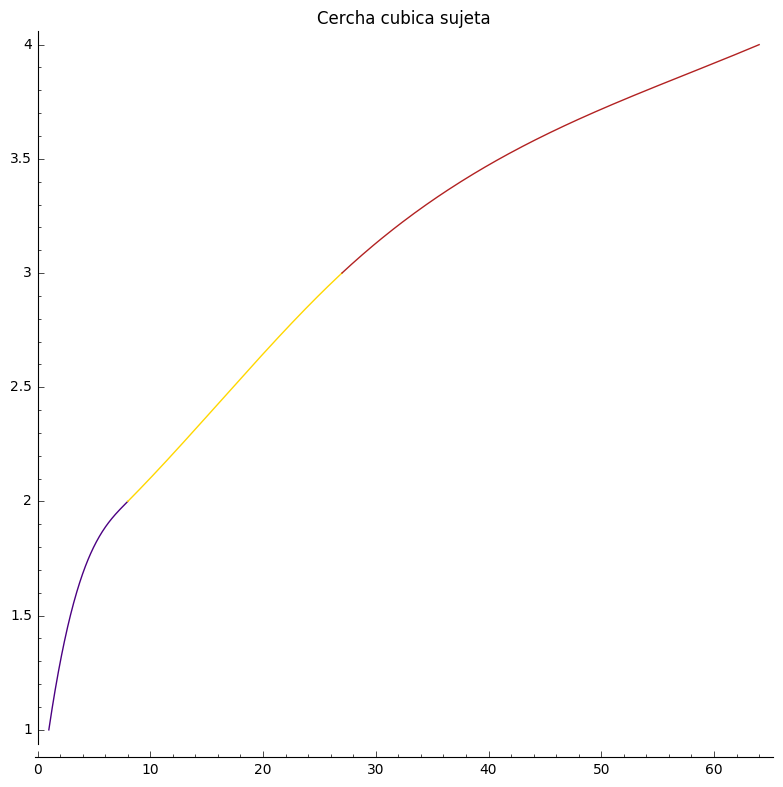

In [118]:
L = []
R = []
polys = []
for p in P:
    polys.append(p[0])
    L.append(p[1])
    R.append(p[2])
plotPoly(polys, "Cercha cubica sujeta", L, R)